In [1]:
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import save_img, to_categorical
import os
import shutil 
import pathlib

In [119]:
colors = [
    [255., 133., 133.],
    [134., 255., 134.],
    [255., 243., 138.],
    [138., 221., 255.]
]

label_colors = dict(zip(range(1, 5), colors))




## 1.Testing Conversion with just white color

In [134]:
ex_img_path = "../../../Data/retinal-lesions-v20191227/lesion_annotations_color/9_left.png"
ex_img = load_img(ex_img_path)

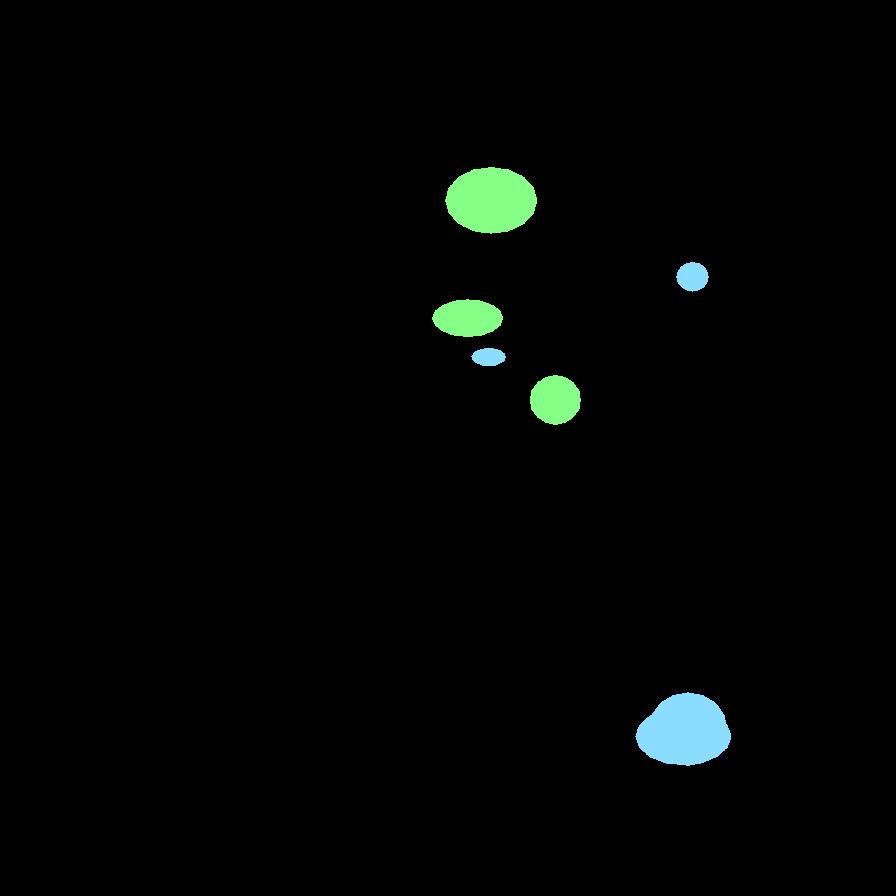

In [135]:
ex_img

In [136]:
ex_img = img_to_array(ex_img)
for i in label_colors.keys():
    ex_img[ex_img == label_colors[i]] = i

In [137]:
ex_img = array_to_img(ex_img, scale=False)

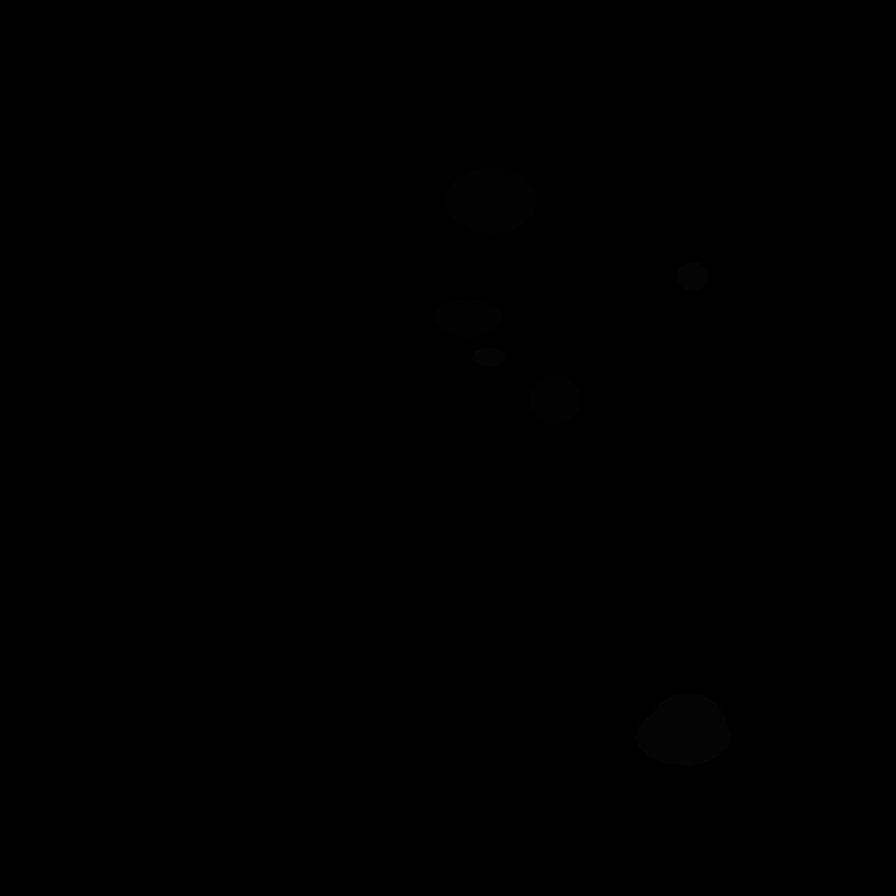

In [138]:
ex_img

In [141]:
ex_img = img_to_array(ex_img)

In [142]:
c = np.nonzero(ex_img)

In [143]:
ex_img[c[0], c[1], :]

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       ...,
       [4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]], dtype=float32)

In [127]:
t_path = "../../../Data/retinal-lesions-v20191227/lesion_segs_896x896/9_left/cotton_wool_spotsN.png"

In [128]:
t_img = load_img(t_path)

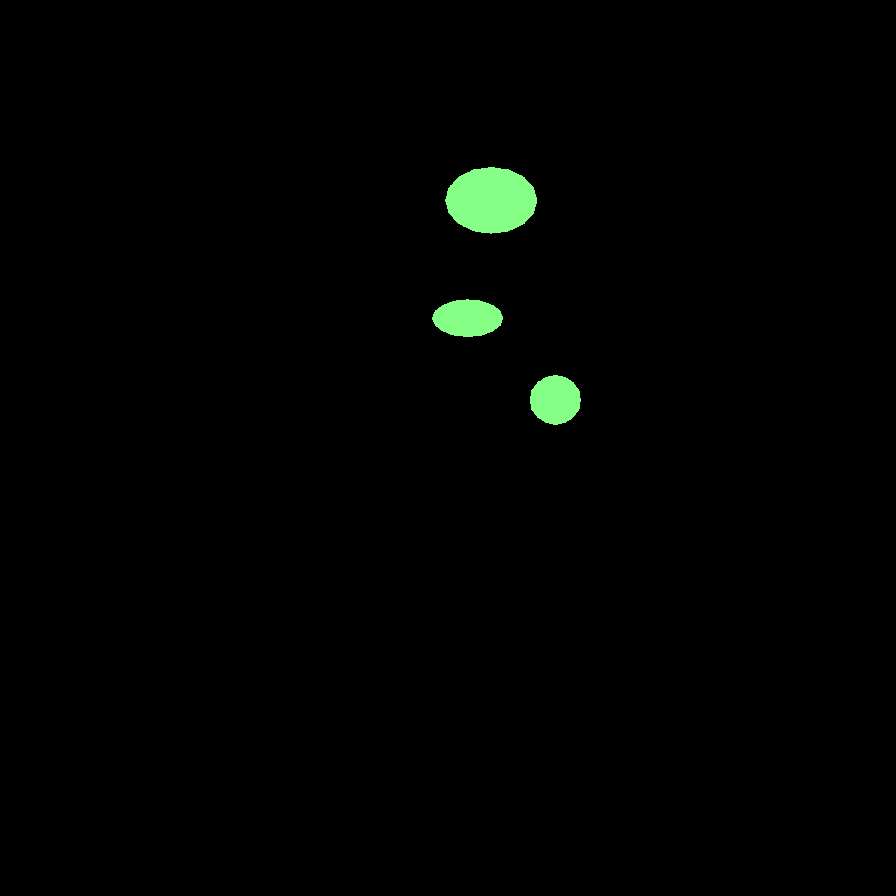

In [129]:
t_img

In [130]:
t_img = img_to_array(t_img)

In [131]:
c = np.nonzero(t_img)
t_img[c[0], c[1], :]

array([[134., 255., 134.],
       [134., 255., 134.],
       [134., 255., 134.],
       ...,
       [134., 255., 134.],
       [134., 255., 134.],
       [134., 255., 134.]], dtype=float32)

In [133]:
t_img[t_img == [134., 255., 134.]]

array([134., 255., 134., ..., 134., 255., 134.], dtype=float32)

## 2. Move all images

In [145]:
bw_dir = "bw_annotations"
main_dir = "../../../Data/retinal-lesions-v20191227"
bw_dir = os.path.join(main_dir, bw_dir)
os.mkdir(bw_dir)
color_dir = "../../../Data/retinal-lesions-v20191227/lesion_annotations_color/"

In [151]:
for dp, dn, fn in os.walk(color_dir):

    for f in fn:
        old_path = os.path.join(dp, f)
        img = load_img(old_path)
        img = img_to_array(ex_img)
        for i in label_colors.keys():
            img[img == label_colors[i]] = i
        
        new_path = os.path.join(bw_dir, f)
        save_img(new_path, img, scale=False)
        
